In [5]:
# import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [6]:
# Create a practice set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [7]:
# add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [8]:
# Use the print() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-2.192633213877727 159.3279372923575
-35.97820151239228 150.89294604184596
-50.28687296270346 -179.824190593926
-10.019521452280742 31.510699394394805
10.472281069514565 -172.6920138302579
-7.467120612329126 -44.71525026675849
70.00838481587638 104.41482665430101
-52.53388966481535 161.04934698628404
-46.72394167811802 -89.95191339909364
-8.609047870796175 179.8229677132805
-22.460497575580376 158.14343944592122
-23.562333656940353 75.94987234358533
88.02137990475933 33.00627227248236
-41.058961386546144 -99.07760538902463
78.7433065499138 -40.62708110398455
-59.01049063900298 130.83467474064707
-33.42479397501651 -37.341466897305736
76.62035398481095 92.68065910910963
-80.34633222283392 -90.63518298971974
37.07397815371952 82.99548084628162
-6.287325035125733 140.21506713811436
-12.10093485293632 93.57819018768413
-74.95392072996354 -147.06931496255095
32.05815995813916 61.19038199857269
-9.116757489661822 29.505138011551026
61.8514130575424 71.35859061417807
-69.22406963872461 78.640

-20.094427122527634 5.7834976732266625
5.620467332460379 160.49356200684548
55.2911725704931 75.44037748149913
49.73515772654065 150.5249945697193
7.865040562381765 -80.63296984299294
-3.0897596183181406 -0.7388050517000977
-59.49724215941393 97.77764772284218
-39.25143526290461 -88.27228016646602
39.76137065149891 -60.77764254625568
38.60392662650784 165.44789223594682
49.70618469292623 66.33068511695964
19.527496662322136 163.3864615085658
16.167610746081166 21.67037116055809
60.2244272962634 19.427242548989824
32.248109867424816 -52.07269834522002
44.58818966533187 -140.53979634967268
-15.94747962322593 4.298872315261036
32.41246407562336 -137.1717672826899
31.866476569514518 -74.84489882140706
-43.00583078976624 -3.247573799085501
9.753188645095207 65.89271548350607
-45.956212714043446 -121.23122125157855
-61.691627352509194 -91.64791287052245
39.82720021095943 125.61826870719096
15.666907985264572 150.68151094364265
40.48264757638003 89.09596308343822
86.24744382753613 82.92868168

-29.60855147945864 -90.83669965760961
52.14422838415078 -114.53409970946406
49.408653169393546 -124.574219028627
41.22903663595895 -152.5586703367589
-66.78284033080503 82.15158631237546
-63.67710244701003 -166.55524665272353
-3.175431570195741 61.118197920792994
-43.27408600935918 43.283577205391026
-13.087069764010636 -115.1504584151397
17.673597414988095 -29.6152049623567
-17.71586822372116 -168.2302038102001
74.54734693962376 -91.7113814140191
-5.708767974072359 17.8990841227847
6.570328429861561 67.4464278158585
-2.128629626484283 38.47682131795622
1.691137225498295 -165.6327748061517
-85.62612589969903 -92.16099472788062
-25.111049595823644 -31.9280364687354
57.476509850155395 21.73460500551846
-16.381428740126424 40.48691307314641
53.96662569368044 -90.84691384116024
-84.46280400191743 -48.277288980716776
14.617745631261869 -33.14988674100414
-27.095716107863375 65.74483199922162
-45.65151613145488 93.6002624799167
35.28751797313706 55.56272158345783
28.474164409227583 -147.8477

In [9]:
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique,  then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Priny the city count to confirm sufficient count
len(cities)

615

In [11]:
# import the requests library
import requests
# Import the API key.
from config import weather_api_key

In [40]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [13]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(1)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kieta
Processing Record 2 of Set 1 | ulladulla
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | mungwi
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | urucui
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | tuatapere
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | asau
Processing Record 11 of Set 1 | hervey bay
Processing Record 12 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 13 of Set 1 | berlevag
Processing Record 14 of Set 1 | ancud
Processing Record 15 of Set 1 | tasiilaq
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | kuche
City not found. Skipping...
Processing Record 21 of Set 1 | kiunga
Processing Record 22 of Set 

Processing Record 37 of Set 4 | saint-doulchard
Processing Record 38 of Set 4 | qaanaaq
Processing Record 39 of Set 4 | ixtapa
Processing Record 40 of Set 4 | rocha
Processing Record 41 of Set 4 | paidha
Processing Record 42 of Set 4 | mabaruma
Processing Record 43 of Set 4 | east foothills
Processing Record 44 of Set 4 | vao
Processing Record 45 of Set 4 | praia da vitoria
Processing Record 46 of Set 4 | kuching
Processing Record 47 of Set 4 | kavieng
Processing Record 48 of Set 4 | emba
Processing Record 49 of Set 4 | jamestown
Processing Record 50 of Set 4 | saint-pierre
Processing Record 1 of Set 5 | hurricane
Processing Record 2 of Set 5 | padang
Processing Record 3 of Set 5 | cabo san lucas
Processing Record 4 of Set 5 | udachnyy
Processing Record 5 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 5 | sao mateus
Processing Record 7 of Set 5 | cabog
Processing Record 8 of Set 5 | maceio
Processing Record 9 of Set 5 | kutum
Processing Record 10 of Set 5

Processing Record 18 of Set 8 | saldanha
Processing Record 19 of Set 8 | kavaratti
Processing Record 20 of Set 8 | kuandian
Processing Record 21 of Set 8 | korla
Processing Record 22 of Set 8 | barawe
City not found. Skipping...
Processing Record 23 of Set 8 | samusu
City not found. Skipping...
Processing Record 24 of Set 8 | osa
Processing Record 25 of Set 8 | thaba nchu
Processing Record 26 of Set 8 | katsuura
Processing Record 27 of Set 8 | noshiro
Processing Record 28 of Set 8 | saint anthony
Processing Record 29 of Set 8 | aleksandrovka
Processing Record 30 of Set 8 | tura
Processing Record 31 of Set 8 | ngunguru
Processing Record 32 of Set 8 | twin falls
Processing Record 33 of Set 8 | syamzha
Processing Record 34 of Set 8 | pashiya
Processing Record 35 of Set 8 | itarema
Processing Record 36 of Set 8 | urengoy
Processing Record 37 of Set 8 | kerema
Processing Record 38 of Set 8 | camacha
Processing Record 39 of Set 8 | saurimo
Processing Record 40 of Set 8 | bardiyah
Processing 

Processing Record 9 of Set 12 | kharhial
Processing Record 10 of Set 12 | tiverton
Processing Record 11 of Set 12 | khash
Processing Record 12 of Set 12 | oranjestad
Processing Record 13 of Set 12 | los llanos de aridane
Processing Record 14 of Set 12 | piopio
Processing Record 15 of Set 12 | bilibino
Processing Record 16 of Set 12 | jieshi
Processing Record 17 of Set 12 | champerico
Processing Record 18 of Set 12 | ereymentau
Processing Record 19 of Set 12 | tobermory
Processing Record 20 of Set 12 | potzu
City not found. Skipping...
Processing Record 21 of Set 12 | baherden
Processing Record 22 of Set 12 | thinadhoo
Processing Record 23 of Set 12 | umm kaddadah
Processing Record 24 of Set 12 | arman
Processing Record 25 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 26 of Set 12 | santa maria da vitoria
Processing Record 27 of Set 12 | baykit
Processing Record 28 of Set 12 | dalbandin
Processing Record 29 of Set 12 | pakhtakoron
Processing Record 30 of Set 12 | av

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kieta,-6.2167,155.6333,79.02,82,100,2.62,PG,2022-07-05 16:58:52
1,Ulladulla,-35.3500,150.4667,55.36,83,98,9.17,AU,2022-07-05 16:58:53
2,Vaini,-21.2000,-175.2000,69.96,73,20,8.05,TO,2022-07-05 16:58:53
3,Mungwi,-10.1732,31.3694,59.68,47,2,5.03,ZM,2022-07-05 16:58:53
4,Kapaa,22.0752,-159.3190,75.52,87,40,18.41,US,2022-07-05 16:58:54
5,Urucui,-7.2294,-44.5561,94.05,29,7,10.25,BR,2022-07-05 16:58:54
6,Khatanga,71.9667,102.5000,55.06,50,100,2.86,RU,2022-07-05 16:58:55
7,Tuatapere,-46.1333,167.6833,42.10,77,66,10.00,NZ,2022-07-05 16:58:55
8,Castro,-24.7911,-50.0119,70.48,46,78,7.16,BR,2022-07-05 16:58:55
9,Asau,46.4333,26.4000,87.28,48,51,0.40,RO,2022-07-05 16:58:56


In [19]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [21]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kieta,PG,2022-07-05 16:58:52,-6.2167,155.6333,79.02,82,100,2.62
1,Ulladulla,AU,2022-07-05 16:58:53,-35.3500,150.4667,55.36,83,98,9.17
2,Vaini,TO,2022-07-05 16:58:53,-21.2000,-175.2000,69.96,73,20,8.05
3,Mungwi,ZM,2022-07-05 16:58:53,-10.1732,31.3694,59.68,47,2,5.03
4,Kapaa,US,2022-07-05 16:58:54,22.0752,-159.3190,75.52,87,40,18.41
5,Urucui,BR,2022-07-05 16:58:54,-7.2294,-44.5561,94.05,29,7,10.25
6,Khatanga,RU,2022-07-05 16:58:55,71.9667,102.5000,55.06,50,100,2.86
7,Tuatapere,NZ,2022-07-05 16:58:55,-46.1333,167.6833,42.10,77,66,10.00
8,Castro,BR,2022-07-05 16:58:55,-24.7911,-50.0119,70.48,46,78,7.16
9,Asau,RO,2022-07-05 16:58:56,46.4333,26.4000,87.28,48,51,0.40


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

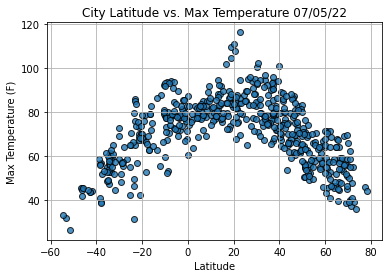

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

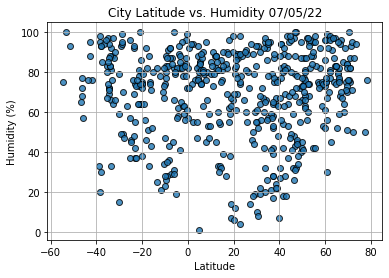

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

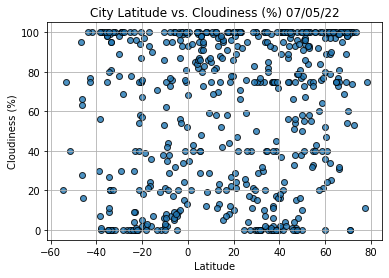

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

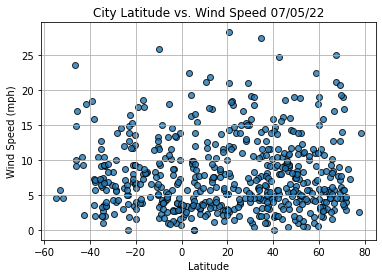

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [41]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [45]:
import pandas as pd
city_data_df = "weather_data/cities.csv"
city_data_df = pd.read_csv(city_data_df)

In [46]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                     Tasiilaq
Country                        GL
Date          2022-07-05 16:58:58
Lat                       65.6145
Lng                      -37.6368
Max Temp                    39.58
Humidity                       80
Cloudiness                     77
Wind Speed                   1.52
Name: 13, dtype: object

In [47]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,4,Kapaa,US,2022-07-05 16:58:54,22.0752,-159.3190,75.52,87,40,18.41
6,6,Khatanga,RU,2022-07-05 16:58:55,71.9667,102.5000,55.06,50,100,2.86
9,9,Asau,RO,2022-07-05 16:58:56,46.4333,26.4000,87.28,48,51,0.40
11,11,Berlevag,NO,2022-07-05 16:54:16,70.8578,29.0864,62.40,87,100,17.27
13,13,Tasiilaq,GL,2022-07-05 16:58:58,65.6145,-37.6368,39.58,80,77,1.52


In [48]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

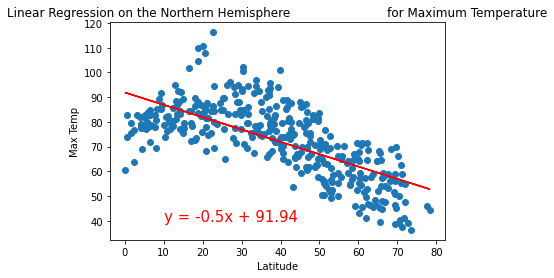

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

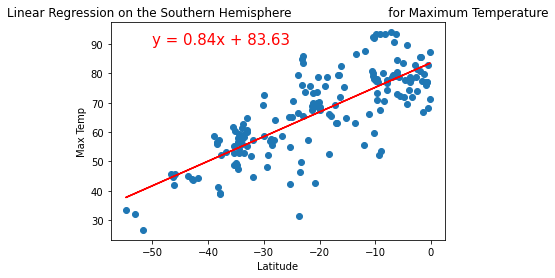

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

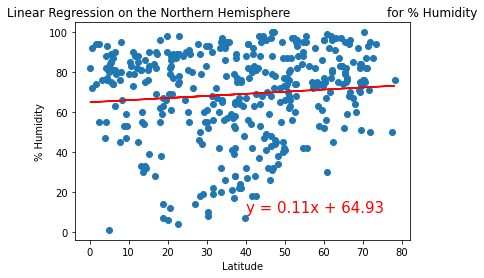

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

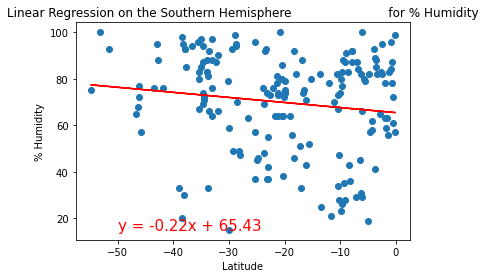

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

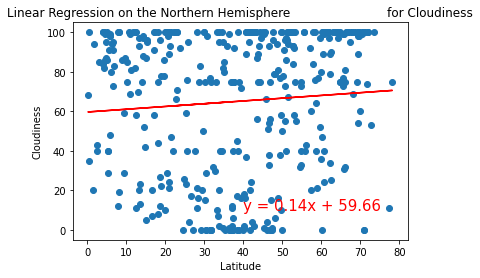

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(40,10))

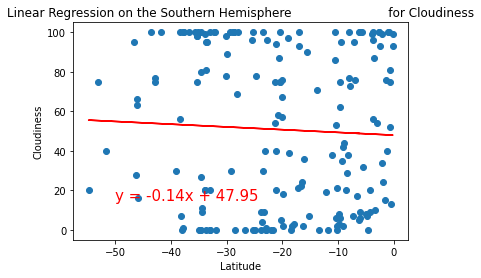

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Cloudiness', 'Cloudiness',(-50,15))

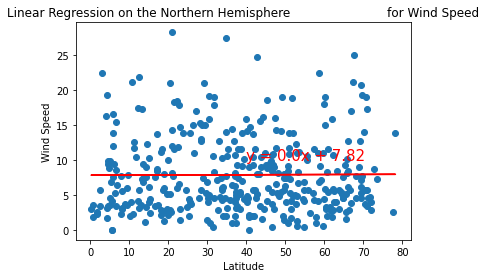

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,10))

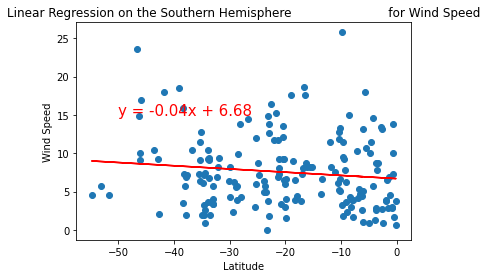

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,15))